### load packages & data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 


from sklearn.metrics import mean_squared_error
from math import sqrt

sns.set(style="whitegrid")
sns.set_palette("Set3")
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)   #음수 표기

In [2]:
ds = pd.read_csv("Data Science and STEM salaries.csv")
ds.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [14]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62639.0,216307.763630,138032.873889,10000.0,135000.0,188000.0,264000.0,4980000.0
yearsofexperience,62639.0,7.204368,5.840417,0.0,3.0,6.0,10.0,69.0
yearsatcompany,62639.0,2.702174,3.263708,0.0,0.0,2.0,4.0,69.0
basesalary,62639.0,136690.858331,61368.464481,0.0,108000.0,140000.0,170000.0,1659870.0
stockgrantvalue,62639.0,51488.546580,81875.754680,0.0,0.0,25000.0,65000.0,2800000.0
bonus,62639.0,19335.544880,26781.672219,0.0,1000.0,14000.0,26000.0,1000000.0
cityid,62639.0,9856.348265,6679.167970,0.0,7369.0,7839.0,11521.0,47926.0
rowNumber,62639.0,41695.691933,24488.876168,1.0,20071.5,42021.0,63022.5,83875.0
Masters_Degree,62639.0,0.245710,0.430511,0.0,0.0,0.0,0.0,1.0
Bachelors_Degree,62639.0,0.201216,0.400913,0.0,0.0,0.0,0.0,1.0


### 데이터 전처리 - NA값 처리

In [14]:
ds.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

- 변수의 의미를 알 수 없는 dmaid, Some_College 변수 삭제
- 전체 데이터의 10% 이상이 null값인 tag, gender, otherdetails, Race, Education 변수 삭제

In [3]:
ds[['dmaid', 'Some_College']]

,dmaid,Some_College
0,807.0,0
1,807.0,0
2,819.0,0
3,807.0,0
4,807.0,0
...,...,...
62637,819.0,0
62638,819.0,0
62639,819.0,0
62640,807.0,0


In [39]:
ds = ds.drop(['dmaid', 'Some_College', 'tag', 'gender', 'otherdetails', 'Race', 'Education'], axis=1)

- 5개의 null data가 있는 company 변수의 경우 같은 level과 location 값을 갖는 record를 고려하여 채워넣고, 채워넣을 company를 특정할 수 없는 경우 해당 행을 제거한다. company가 null값인 행과 같은 location및 level을 가진 행을 출력하여 확인해본다.

In [4]:
ds[ds['company'].isnull()==True]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,...,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1403,9/23/2018 15:53:13,NaN,VP,Software Engineering Manager,292000,"Austin, TX",15.0,4.0,250000.0,0.0,...,2244,0,0,0,0,0,0,0,0,0
8579,7/11/2019 7:28:03,NaN,Mid-level,Software Engineer,85000,"Atlanta, GA",2.0,0.0,85000.0,0.0,...,11672,0,0,0,0,0,0,0,0,0
9045,7/23/2019 20:47:51,NaN,Junior,Software Engineer,47000,"Melbourne, VI, Australia",2.0,1.0,47000.0,0.0,...,12290,0,0,0,0,0,0,0,0,0
26999,8/19/2020 1:49:49,NaN,Senior,Software Engineer,113000,"Dublin, DN, Ireland",5.0,1.0,113000.0,0.0,...,37093,0,1,0,0,0,1,0,0,0
29433,9/9/2020 17:52:14,NaN,Mid Level,Software Engineer,54000,"Arlington, VA",3.0,2.0,54000.0,0.0,...,40475,0,1,0,0,0,0,0,0,1


In [19]:
ds[(ds['level']=="VP") & (ds['location']=="Austin, TX")]   # Expedia로 대체

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1403,9/23/2018 15:53:13,NaN,VP,Software Engineering Manager,292000,"Austin, TX",15.0,4.0,NaN,250000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
36759,12/7/2020 21:15:42,Expedia,VP,Software Engineering Manager,450000,"Austin, TX",20.0,10.0,Full Stack,250000.0,...,1,0,0,0,1,0,0,0,White,PhD


In [20]:
ds[(ds['level']=="Mid-level") & (ds['location']=="Atlanta, GA")]  # 같은 location에 위치한 회사가 없음 -> 해당 행 제거

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
8579,7/11/2019 7:28:03,NaN,Mid-level,Software Engineer,85000,"Atlanta, GA",2.0,0.0,Distributed Systems (Back-End),85000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [22]:
ds[(ds['level']=="Junior") & (ds['location']=="Melbourne, VI, Australia")]  # 같은 location에 위치한 회사가 없음 -> 해당 행 제거

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
9045,7/23/2019 20:47:51,NaN,Junior,Software Engineer,47000,"Melbourne, VI, Australia",2.0,1.0,API Development (Back-End),47000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [23]:
ds[(ds['level']=="Senior") & (ds['location']=="Dublin, DN, Ireland")] # 같은 위치를 가진 Workhuman으로 대체

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
215,3/11/2018 12:25:32,Intercom,Senior,Software Engineer,170000,"Dublin, DN, Ireland",18.0,1.0,NaN,120000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
26999,8/19/2020 1:49:49,NaN,Senior,Software Engineer,113000,"Dublin, DN, Ireland",5.0,1.0,Web Development (Front-End),113000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
47426,4/7/2021 14:57:13,Workhuman,Senior,Software Engineer,77000,"Dublin, DN, Ireland",4.0,0.0,Web Development (Front-End),70000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
56276,7/1/2021 8:22:39,Workhuman,Senior,Software Engineer,111000,"Dublin, DN, Ireland",6.0,1.0,Web Development (Front-End),101000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
59272,7/28/2021 6:36:35,Viasat,Senior,Software Engineer,85000,"Dublin, DN, Ireland",5.0,2.0,Support,85000.0,...,0,0,0,0,0,0,0,1,Hispanic,Bachelor's Degree
60450,8/6/2021 3:27:13,HubSpot,Senior,Software Engineer,118000,"Dublin, DN, Ireland",5.0,2.0,Web Development (Front-End),100000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [4]:
ds[(ds['level']=="Mid Level") & (ds['location']=="Arlington, VA")]   # 같은 location에 위치한 회사가 없음 -> 해당 행 제거

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
29433,9/9/2020 17:52:14,NaN,Mid Level,Software Engineer,54000,"Arlington, VA",3.0,2.0,Full Stack,54000.0,...,0,0,0,0,0,0,0,1,Hispanic,Bachelor's Degree


In [40]:
ds.loc[1403, 'company'] = 'Expedia'
ds.loc[26999, 'company'] = 'Workhuman'
ds = ds.drop(index=[8579, 9045, 29433])

- level 변수는 회사마다의 표기가 다르며 한 회사 내에도 여러 level이 존재하므로 비슷한 데이터를 가진 행을 고려하여 채워넣을 수 없다고 판단하였다. 따라서 level 변수가 null값인 행은 데이터에서 제외한다.

In [41]:
ds = ds.dropna(axis=0)

In [20]:
ds.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

### EDA

In [21]:
ds.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,...,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,...,1,0,0,0,0,0,0,0,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,...,2,0,0,0,0,0,0,0,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,...,3,0,0,0,0,0,0,0,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,...,7,0,0,0,0,0,0,0,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,...,9,0,0,0,0,0,0,0,0,0


#### Target variable: total yearly compensation

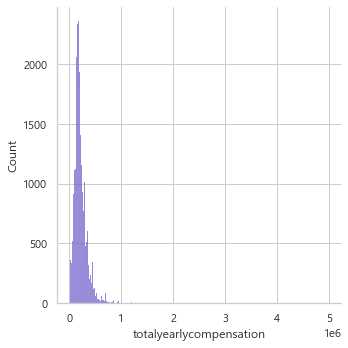

In [59]:
sns.displot(x="totalyearlycompensation", data=ds, color="slateblue");

왼쪽으로 매우 몰려있는 것을 알 수 있다. 값이 매우 큰 일부 데이터를 확인하기 위해 연봉이 1,000,000 이상인 경우의 그래프를 확인해본다.

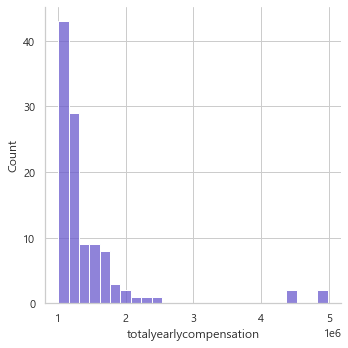

In [60]:
temp = ds[ds['totalyearlycompensation'] > 1000000]
sns.displot(x="totalyearlycompensation", data=temp, color="slateblue");

연봉 변수가 크게는 5,000,000까지의 값도 갖는 것을 확인할 수 있다.      
다음으로 변수에 log를 취한 그래프를 확인해본다.

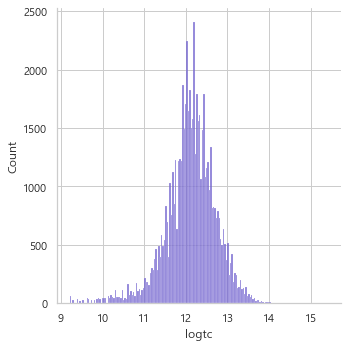

In [10]:
temp = pd.DataFrame({'logtc':np.log(ds['totalyearlycompensation'])})
sns.displot(x="logtc", data=temp, color="slateblue");

로그를 취했을 때 고른 분포를 갖는 것을 확인할 수 있다. 이를 고려하여 분석 시 target 변수에 로그를 취하여 예측을 진행한다.

- 회사 관련 변수: company, title, location

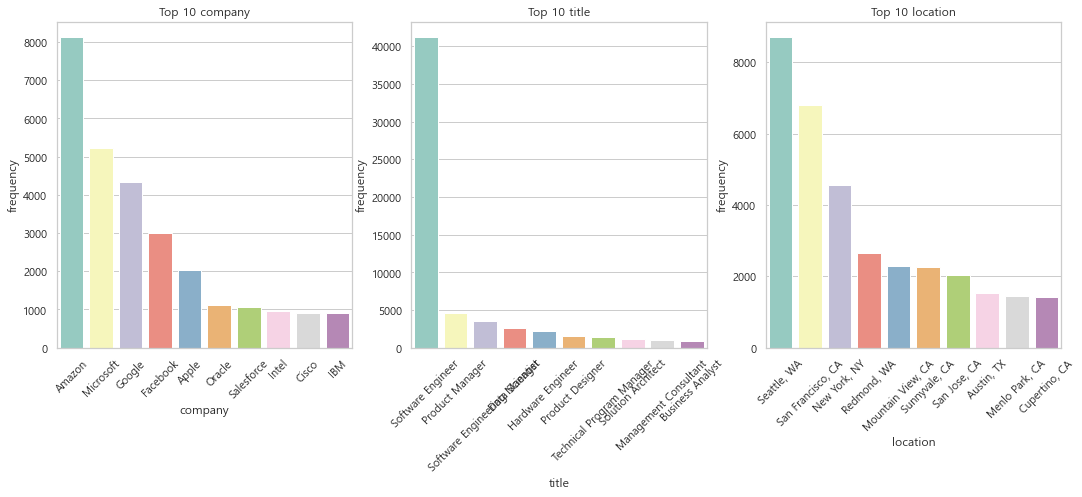

In [80]:
# company, title, location
fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(['company', 'title', 'location']):
    temp=ds[col].value_counts().iloc[:10].reset_index()
    sns.barplot(x='index', y=col, data=temp, ax=plt.subplot(1, 3, i+1))
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.title("Top 10 "+col)
    plt.xticks(rotation=45)

- 경력 관련 변수: yearsofexperience, yearsatcompany

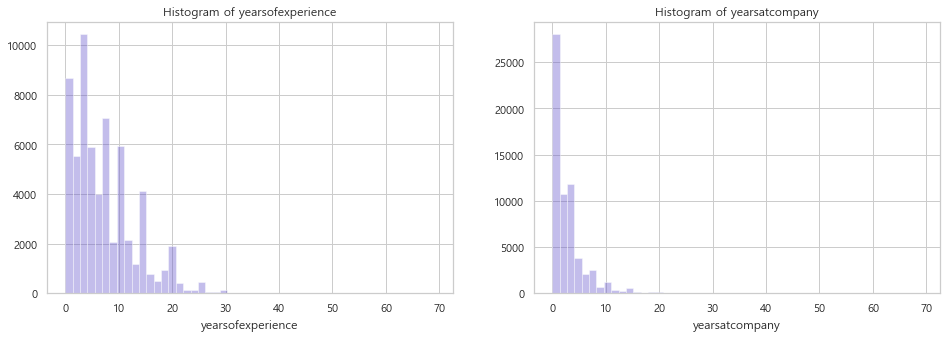

In [58]:
fig = plt.figure(figsize=(16, 5))
for i, col in enumerate(['yearsofexperience', 'yearsatcompany']):
    sns.distplot(x=ds[col], ax=plt.subplot(1,2, i+1), color="slateblue", hist=True, kde=False, rug=False)
    plt.xlabel(col)
    plt.title("Histogram of "+col);

- 연봉 관련 변수: basesalary, stockgrantvalue, bonus

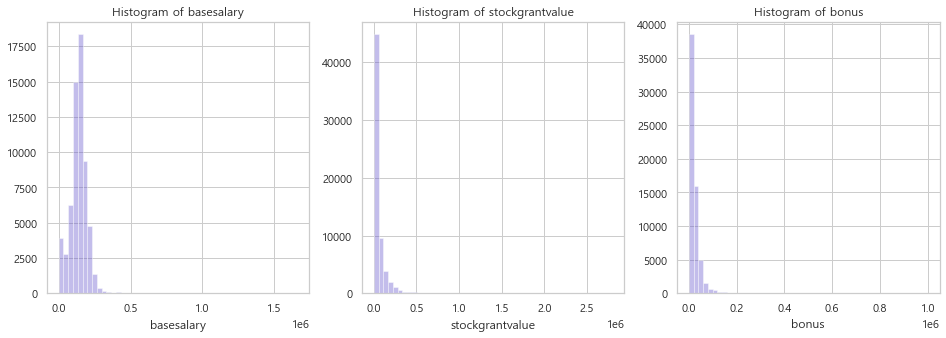

In [57]:
fig = plt.figure(figsize=(16, 5))
for i, col in enumerate(["basesalary", "stockgrantvalue", "bonus"]):
    sns.distplot(x=ds[col], ax=plt.subplot(1,3, i+1), color="slateblue", hist=True, kde=False, rug=False)
    plt.xlabel(col)
    plt.title("Histogram of "+col);

C:\Users\YJ-HWANG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YJ-HWANG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YJ-HWANG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

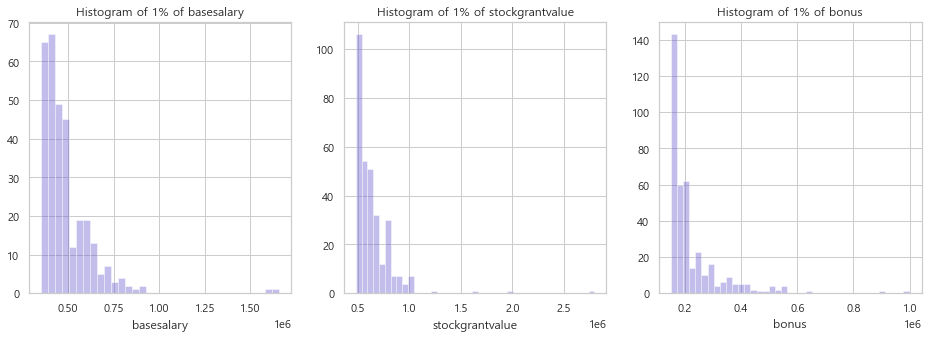

In [66]:
fig = plt.figure(figsize=(16, 5))
for i, col in enumerate(["basesalary", "stockgrantvalue", "bonus"]):
    temp = ds[ds[col]>=ds[col].quantile(0.995)]
    sns.distplot(x=temp[col], ax=plt.subplot(1,3, i+1), color="slateblue", hist=True, kde=False, rug=False)
    plt.xlabel(col)
    plt.title("Histogram of 1% of "+col);

- 학위 관련 변수

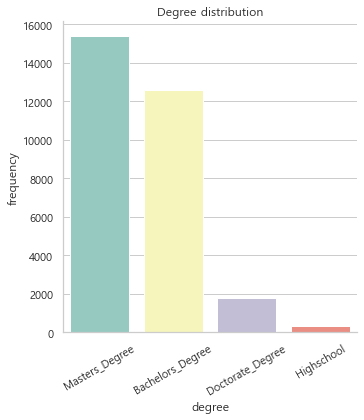

In [74]:
degree = pd.DataFrame({
    'degree' : ['Masters_Degree', 'Bachelors_Degree','Doctorate_Degree', 'Highschool'],
    'frequency': [sum(ds['Masters_Degree']), sum(ds['Bachelors_Degree']), sum(ds['Doctorate_Degree']), sum(ds['Highschool'])]
})

sns.catplot(x='degree', y='frequency', data=degree, kind="bar")
plt.xticks(rotation=30)
plt.title("Degree distribution");

- 인종 관련 변수

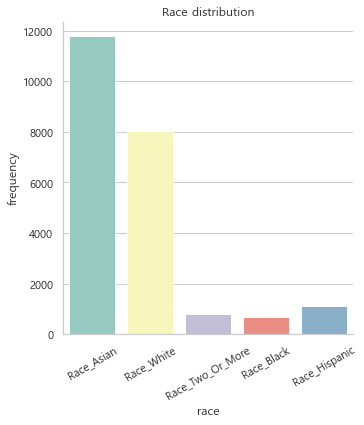

In [77]:
race = pd.DataFrame({
    'race' : ['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
    'frequency': [sum(ds['Race_Asian']), sum(ds['Race_White']), sum(ds['Race_Two_Or_More']), 
                  sum(ds['Race_Black']), sum(ds['Race_Hispanic'])]
})

sns.catplot(x='race', y='frequency', data=race, kind="bar")
plt.xticks(rotation=30)
plt.title("Race distribution");

In [28]:
ds.head().iloc[:, :15]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,rowNumber,Masters_Degree,Bachelors_Degree
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,7392,1,0,0
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,7419,2,0,0
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,11527,3,0,0
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,7472,7,0,0
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,7322,9,0,0


### 분석을 위한 전처리

#### target 변수 log transformation

In [42]:
data = ds.copy()

In [43]:
data['logy'] = np.log(data['totalyearlycompensation'])

#### 분석에 사용하지 않을 변수 제거
- timestamp(데이터 등록 시간), cityid(회사 위치 관련 변수 - location 중복되는 정보), rowNumber(행번호), totalyearlycompensation(log를 취하지 않은 y변수)

In [44]:
data = data.drop(['timestamp', 'cityid', 'rowNumber', 'totalyearlycompensation'], axis=1)

#### 범주형 변수 처리 - Binary Encoding
현재 처리해야 할 범주형 변수로는 company, level, title, location 변수가 있다.       

In [57]:
pd.get_dummies(data)

,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
0,1.5,1.5,107000.0,20000.0,10000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,0.0,155000.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,5.0,157000.0,180000.0,35000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,3.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,10.0,1.0,155000.0,150000.0,22000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62638,2.0,2.0,146900.0,73200.0,16000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62639,14.0,12.0,157000.0,25000.0,20000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62640,8.0,4.0,194688.0,57000.0,29000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
print("number of features in company variable:", data['company'].nunique()) 
print("number of features in level variable:", data['level'].nunique()) 
print("number of features in title variable:", data['title'].nunique())
print("number of features in title variable:", data['location'].nunique())

number of features in company variable: 1628
number of features in level variable: 2923
number of features in title variable: 15
number of features in title variable: 1050


네 변수 모두 변수 내 범주의 개수가 많아 범주형 변수에 대해 one-hot encoding을 적용하면 column 수가 총 5631개로 과도하게 많아지므로 적절하지 않다고 판단하였다.      
따라서 one-hot encoding과 비슷하지만 범주형 변수값들을 이진법으로 변환하여 one-hot encoding보다 훨씬 적은 개수의 변수를 생성하는 Binary-encoding 방법으로 범주형 변수를 처리한다.

In [45]:
# Using BinaryEncoder
encoder = BinaryEncoder().fit(data)
data = encoder.transform(data)
data.head()

,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,logy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.751942
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11.512925
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12.644328
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,12.826649
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11.964001


one-hot encoding을 적용했을 때 column수가 5631개였던 반면 Binary encoding을 적용했을 때의 column수는 53개로 훨씬 감소한 것을 알 수 있다.

#### 연속형 x변수 처리
데이터 내 연속형 변수들 간 단위 차이가 존재하므로 , MinMaxScaler로 변수들에 대해 정규화를 적용한다.

In [46]:
cvars = data[['yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']]

scaler = MinMaxScaler()
scaler.fit(cvars)
cvars = pd.DataFrame(scaler.transform(cvars))
data[['yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']] = cvars

In [10]:
ds[['yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']].head()  #정규화 전

,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,1.5,1.5,107000.0,20000.0,10000.0
1,5.0,3.0,0.0,0.0,0.0
2,8.0,0.0,155000.0,0.0,0.0
3,7.0,5.0,157000.0,180000.0,35000.0
4,5.0,3.0,0.0,0.0,0.0


In [11]:
data[['yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']].head()  #정규화 후

,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,0.021739,0.021739,0.064463,0.007143,0.010
1,0.072464,0.043478,0.000000,0.000000,0.000
2,0.115942,0.000000,0.093381,0.000000,0.000
3,0.101449,0.072464,0.094586,0.064286,0.035
4,0.072464,0.043478,0.000000,0.000000,0.000


In [11]:
data.isnull().sum()

company_0              0
company_1              0
company_2              0
company_3              0
company_4              0
company_5              0
company_6              0
company_7              0
company_8              0
company_9              0
company_10             0
level_0                0
level_1                0
level_2                0
level_3                0
level_4                0
level_5                0
level_6                0
level_7                0
level_8                0
level_9                0
level_10               0
level_11               0
title_0                0
title_1                0
title_2                0
title_3                0
location_0             0
location_1             0
location_2             0
location_3             0
location_4             0
location_5             0
location_6             0
location_7             0
location_8             0
location_9             0
location_10            0
yearsofexperience    122
yearsatcompany       122


Minmax scaling 과정에서 null값이 생긴 행은 삭제한다.

In [47]:
data = data.dropna(axis=0)

#### train, test set 분리

In [48]:
X = data.drop(['logy'], axis=1)
y = data['logy']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)
train_x.head()

,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,...,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
8294,0,0,0,0,0,0,1,0,1,1,...,0.008,0,0,0,0,0,0,0,0,0
52569,0,0,0,0,0,0,1,1,0,0,...,0.015,0,1,0,0,0,0,0,1,0
42382,0,1,1,0,1,1,1,1,1,1,...,0.016,0,0,1,0,1,0,0,0,0
38884,0,0,0,0,0,0,0,0,1,0,...,0.000,1,0,0,0,0,1,0,0,0
29677,0,0,0,1,1,1,1,1,1,0,...,0.085,0,1,0,0,1,0,0,0,0


### 모델링

여러 모델을 적합해보고 RMSE를 기준으로 하여 RMSE가 가장 낮은 모델을 최종 모델로 선택한다.          
이때 타겟 변수에 log를 씌워 예측하였으므로 RMSE를 계산할 때는 다시 exp를 취한다.

#### 1) 선형회귀

In [15]:
lin_reg = LinearRegression() 
lin_reg.fit(train_x, train_y)

pred_y_linreg = lin_reg.predict(test_x)
rmse_linreg = sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_linreg)))
rmse_linreg

122668.25191491743

#### 2) SGD

In [16]:
sgd = SGDRegressor()
sgd_grid = {
    'max_iter' : [100, 500, 1000],
    'eta0' : [0.01, 0.05, 0.1],
    'tol': [1e-3, 1e-2],
    'random_state':[777]
}
sgdCV = GridSearchCV(sgd, sgd_grid)
sgdCV.fit(train_x, train_y)
print(sgdCV.best_params_)
print("best score", sgdCV.best_score_)

{'eta0': 0.01, 'max_iter': 100, 'random_state': 777, 'tol': 0.001}
best score 0.34344696049420753


In [17]:
pred_y_sgd=sgdCV.predict(test_x)
rmse_sgd=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_sgd)))
rmse_sgd

122335.74070480106

#### 3) Ridge regression

In [18]:
ridge = Ridge()
ridge_grid = {
    'alpha' : [0.01, 0.05, 0.1, 0.5, 1],
    'solver': ["cholesky"],
    'random_state':[777]
}
ridgeCV = GridSearchCV(ridge, ridge_grid)
ridgeCV.fit(train_x, train_y)
print(ridgeCV.best_params_)
print("best score", ridgeCV.best_score_)

{'alpha': 1, 'random_state': 777, 'solver': 'cholesky'}
best score 0.3476921837775399


In [19]:
pred_y_ridge=ridgeCV.predict(test_x)
rmse_ridge=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_ridge)))
rmse_ridge

122669.90311001142

#### 4) Lasso regression

In [20]:
lasso = Lasso()
lasso_grid = {
    'alpha' : [0.01, 0.05, 0.1, 0.5, 1],
    'random_state':[777]
}
lassoCV = GridSearchCV(lasso, lasso_grid)
lassoCV.fit(train_x, train_y)
print(lassoCV.best_params_)
print("best score", lassoCV.best_score_)

{'alpha': 0.01, 'random_state': 777}
best score 0.30448310612791113


In [21]:
pred_y_lasso=lassoCV.predict(test_x)
rmse_lasso=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_lasso)))
rmse_lasso

126888.51011447747

#### 5) Elastic Net

In [22]:
en = ElasticNet()
en_grid = {
    'alpha' : [0.01, 0.1, 1],
    'l1_ratio': [0.3, 0.5, 0.7], 
    'random_state':[777]
}
enCV = GridSearchCV(en, en_grid)
enCV.fit(train_x, train_y)
print(enCV.best_params_)
print("best score", enCV.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.3, 'random_state': 777}
best score 0.33876085235104025


In [23]:
pred_y_en=enCV.predict(test_x)
rmse_en=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_en)))
rmse_en

124053.76168264596

#### 6) 회귀나무

In [24]:
dt = DecisionTreeRegressor()
dt_grid = {
    'max_depth': [2, 3, 4, 5],
    'random_state': [777]
}
dtCV = GridSearchCV(dt, dt_grid)
dtCV.fit(train_x, train_y)
print(dtCV.best_params_)
print("best score", dtCV.best_score_)

{'max_depth': 5, 'random_state': 777}
best score 0.35469473995544065


In [25]:
pred_y_dt=dtCV.predict(test_x)
rmse_dt=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_dt)))
rmse_dt

127045.40582842058

#### 7) 랜덤포레스트

In [13]:
rf = RandomForestRegressor()
rf_grid = {
    'n_estimators':[100, 300, 500],
    'max_leaf_nodes':[10,15,20],
    'random_state':[777]
}
rfCV = GridSearchCV(rf, rf_grid)
rfCV.fit(train_x, train_y)
print(rfCV.best_params_)
print("best score", rfCV.best_score_)

{'max_leaf_nodes': 20, 'n_estimators': 100, 'random_state': 777}
best score 0.3789817466056237


In [14]:
pred_y_rf=rfCV.predict(test_x)
rmse_rf=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_rf)))
rmse_rf

122638.22074647051

#### 8) 부스팅 - adaboost (랜덤포레스트 이용)

In [22]:
ada = AdaBoostRegressor(RandomForestRegressor(max_leaf_nodes=20,n_estimators=100,
                                    random_state=777),
                       n_estimators=100, learning_rate=0.5)
ada.fit(train_x, train_y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=20,
                                                       random_state=777),
                  learning_rate=0.5, n_estimators=100)

In [23]:
pred_y_ada=ada.predict(test_x)
rmse_ada=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_ada)))
rmse_ada

122752.11610054864

#### 9) 부스팅 - gradient boosting

In [50]:
gbt = GradientBoostingRegressor()
gbt_grid = {
    'learning_rate':[0.1, 0.5, 1.0],
    'random_state':[777]
}
gbtCV = GridSearchCV(gbt, gbt_grid)
gbtCV.fit(train_x, train_y)
print(gbtCV.best_params_)
print("best score", gbtCV.best_score_)

{'learning_rate': 1.0, 'random_state': 777}
best score 0.537628836083522


In [51]:
gbt = GradientBoostingRegressor(
                                 learning_rate=1.0, random_state=777) 
gbt.fit(train_x, train_y)

pred_y_gbt=gbt.predict(test_x)
rmse_gbt=sqrt(mean_squared_error(np.exp(test_y), np.exp(pred_y_gbt)))
rmse_gbt

107107.09356223214

#### Result

In [13]:
results = pd.DataFrame({'method':['linear', 'SGD', 'Ridge', 
                                  'Lasso', 'Elastic net', 'regression tree', 
                                  'random forest', 'adaboost', 'gradient boosting'],
                       'RMSE':[122668.252, 122335.741, 122669.903, 
                               126888.510, 124053.762, 127045.406, 
                               122638.221, 122752.116, 107107.094]})

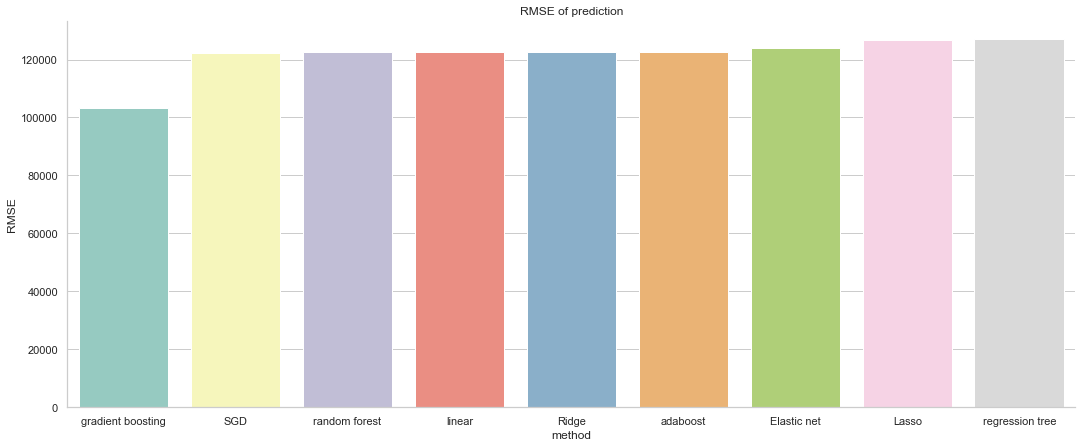

In [38]:
results = results.sort_values(by='RMSE')

sns.set(style="whitegrid")
sns.set_palette("Set3")
sns.catplot(x='method', y='RMSE', data=results, kind="bar", height=6, aspect=2.5)
plt.title("RMSE of prediction");